<a href="https://colab.research.google.com/github/Abir196/Human_following/blob/main/depth_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def depth_distance(img, x1, y1, x2, y2):
  #enter image
  image = Image.open(img)

  # prepare image for the model
  inputs = processor(images=image, return_tensors="pt")

  with torch.no_grad():
      outputs = model(**inputs)
      predicted_depth = outputs.predicted_depth

    # interpolate to original size
  prediction = torch.nn.functional.interpolate(
      predicted_depth.unsqueeze(1),
      size=image.size[::-1],
      mode="bicubic",
      align_corners=False,
  )

  # visualize the prediction
  output = prediction.squeeze().cpu().numpy()
  formatted = (output * 255 / np.max(output)).astype("uint8")
  depth = Image.fromarray(formatted)
  depth_im = depth.resize((700,700))
  #depth_image
  depth_im.save("output_image.png")
  im = cv2.imread("/content/output_image.png")
  cv2.rectangle(im, (x1, y1), (x2, y2), (0, 255, 0), 2)
  cv2.imwrite("depth_with_box.png",im)
  def median(x1,y1,x2,y2):
    height = x2 - x1
    width = y2 - y1
    med = (x1 + height//2, y1 + width//2)
    return med
    #depth with box
  image = cv2.imread('/content/depth_with_box.png')
  (x, y) = median(x1, y1, x2, y2)
  med = median(x1, y1, x2, y2)
  cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
  cv2_imshow(image)
  pixel_value = output[med[0]][med[1]]
  return pixel_value

In [37]:
paths = ["/content/ABir.jpg", "/content/Anass.jpg", "/content/Doae.jpg", "/content/Hafsa.jpg", "/content/Hajar.jpeg", "/content/Moulim.jpg", "/content/Nabil.jpg", "/content/Sara.jpg", "/content/Yamani.jpg"]
x_y = [[251, 331, 420, 616], [272, 253, 438, 519], [257, 345, 346, 489], [171, 376, 476, 683], [227, 323, 439, 646], [188, 283, 477, 645], [159, 368, 669, 625], [242, 286, 578, 569], [110, 321, 507, 683]]

#depth_distance("orig_image.png", 153, 269, 436, 422)

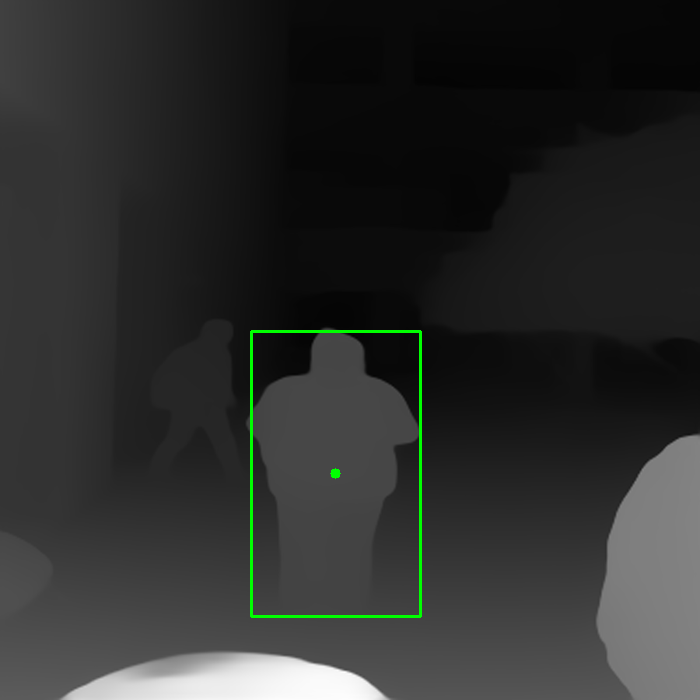

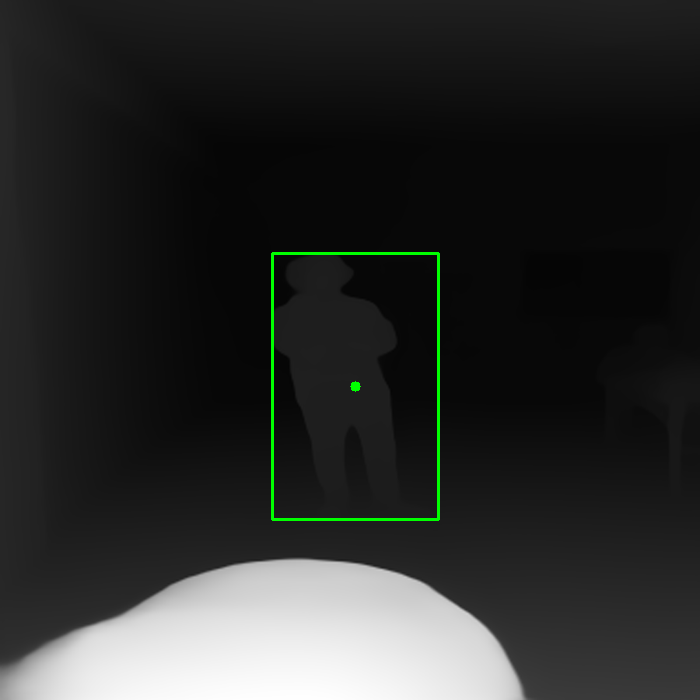

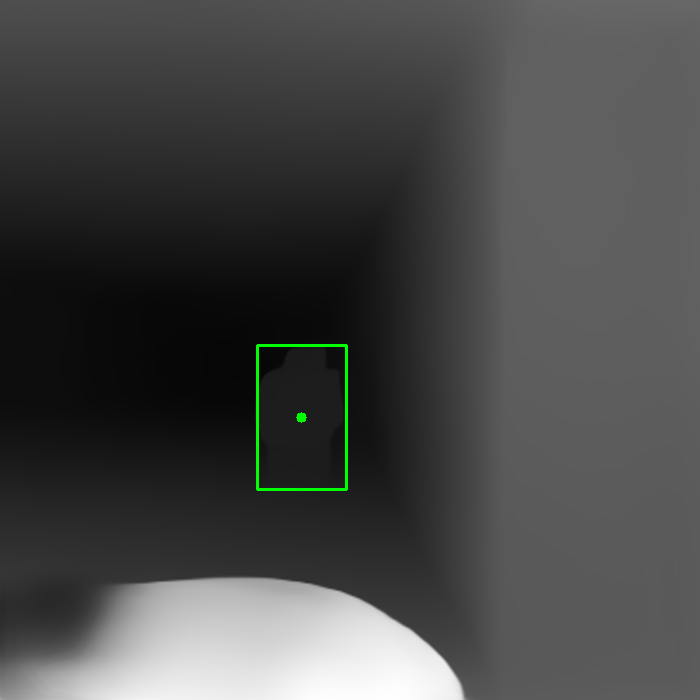

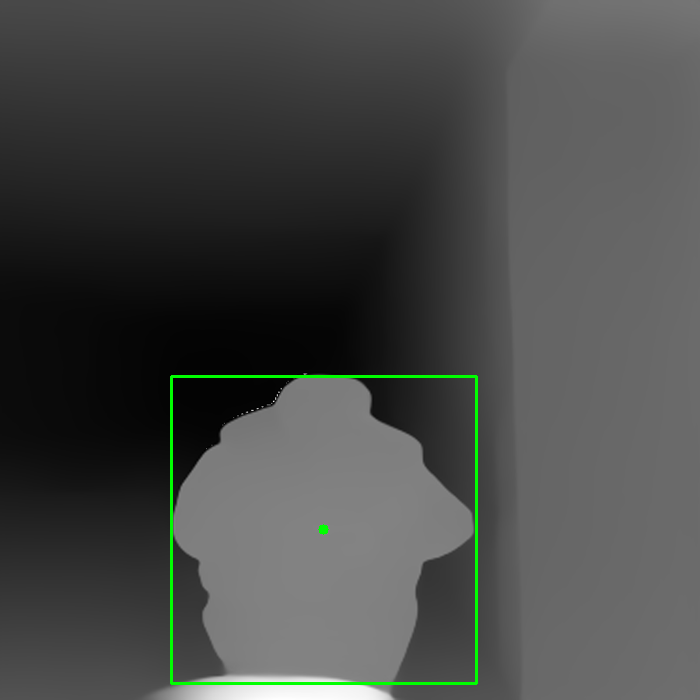

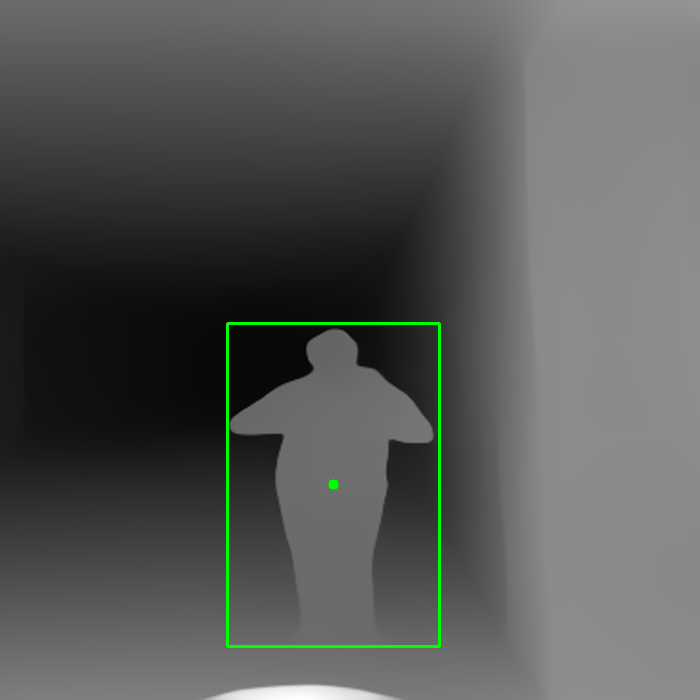

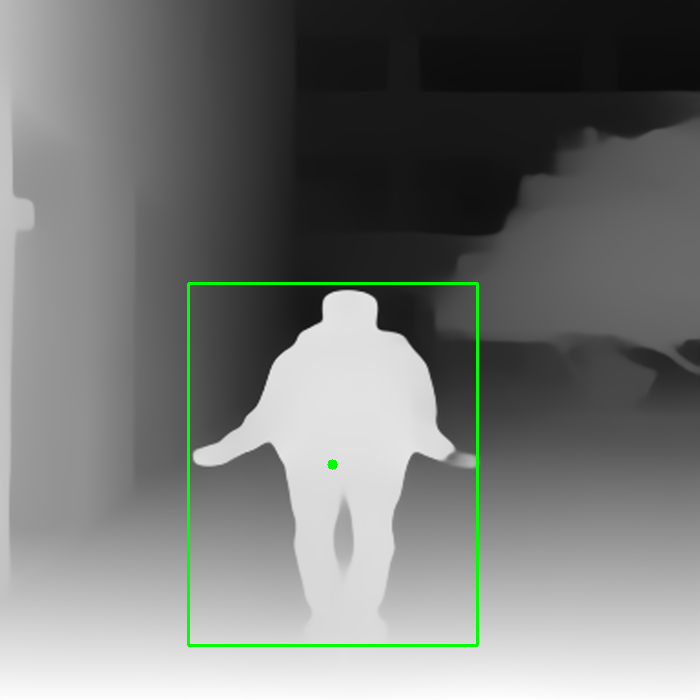

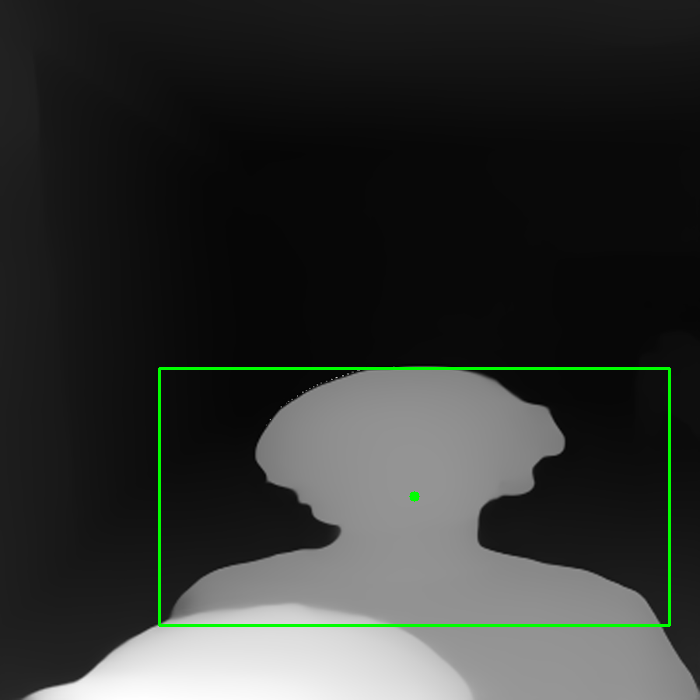

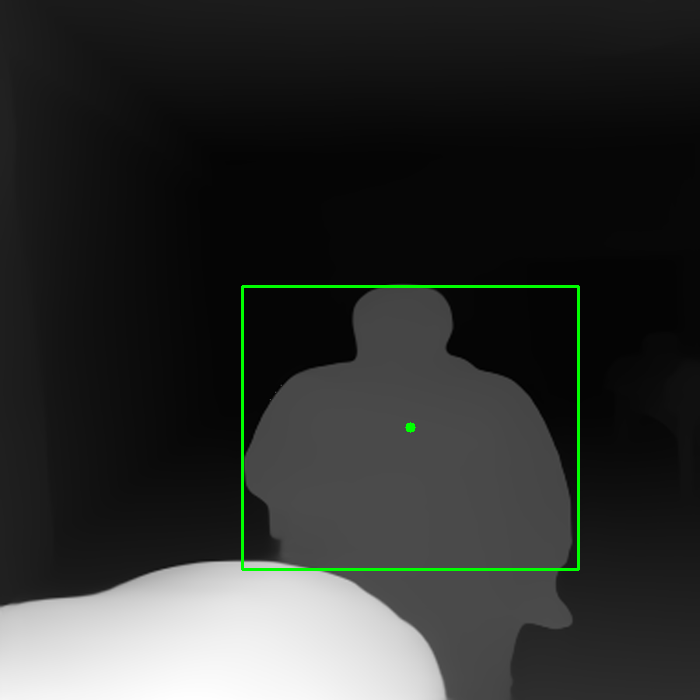

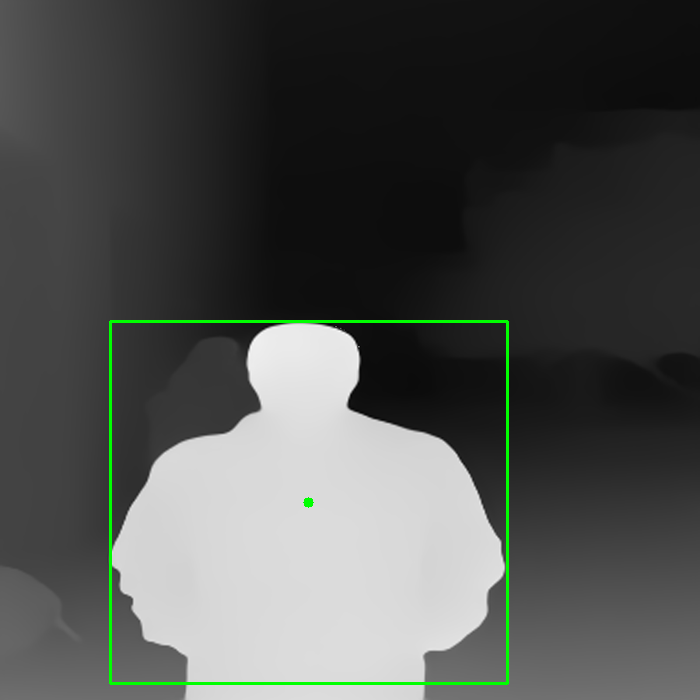

In [58]:
pix_val = []
for i in range(len(paths)):
  a = depth_distance(paths[i], x_y[i][0],  x_y[i][1],  x_y[i][2],  x_y[i][3])
  pix_val.append(a)

In [59]:
pix_val

[2.8310738,
 3.1108801,
 12.769714,
 10.414785,
 12.988054,
 3.0263572,
 2.629074,
 2.2405174,
 2.5904357]

In [45]:
real_distance = [275, 360, 600, 180, 300, 275, 90, 135, 200]

In [66]:
X = np.array([pix_val[0], pix_val[1], pix_val[7], pix_val[8]])
Y = np.array([real_distance[0], real_distance[1], real_distance[7], real_distance[8]])

In [63]:
Y

[275, 360, 135, 200]

In [64]:
import numpy as np
from scipy.optimize import curve_fit

def quadratic_fit(X, Y, h):
    # Define the quadratic function
    def quadratic_function(x, a, b, c):
        return (a * x**2 + b * x + c) * h

    # Use curve_fit to find the parameters a, b, and c
    params, covariance = curve_fit(quadratic_function, X, Y)

    # Extract the fitted parameters
    a, b, c = params

    return a, b, c

# Example usage:
h = 12.7

a, b, c = quadratic_fit(X, Y, h)

print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")


Fitted parameters: a = 8.916430318702696, b = -27.10384972693842, c = 26.5046495647402


In [29]:
x = pix_val[6]
res = (a * x**2 + b * x + c) * h

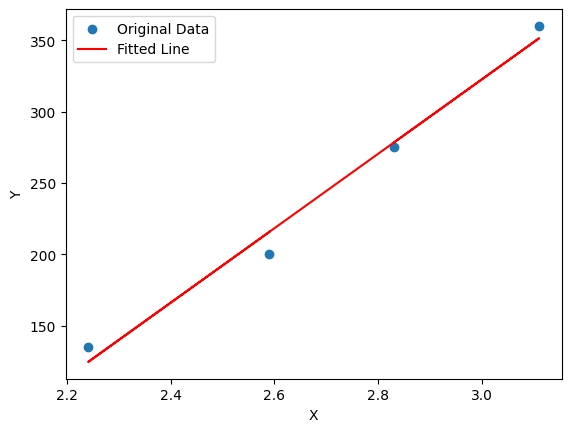

Slope: 260.64242362710957, Intercept: -459.46914871335775


In [79]:
import numpy as np
import matplotlib.pyplot as plt


# Fit a line (linear regression) using numpy's polyfit
slope, intercept = np.polyfit(X, Y, 1)

# Generate Y values for the fitted line
fit_line = slope * X + intercept

# Plot the original data and the fitted line
plt.scatter(X, Y, label='Original Data')
plt.plot(X, fit_line, label='Fitted Line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.savefig("curve_depth.png", dpi=300)
plt.show()
print(f"Slope: {slope}, Intercept: {intercept}")



In [75]:
x_douaa = (90 - intercept)/slope
x_douaa

2.108133975532167